# Home loan repayments 

This is a notebook I made when we were shopping for houses. I wanted to know how long it would take to repay a given loan if we could afford to repay some fixed amount \$R. 

A nice result was that to a good approximation, the behaviour of a loan over time is completely specified by the "affordability factor" $\frac{L_0 I}{R}$. This is how much you interest you need to pay each month on the original loan, divided by how much you can actually afford to pay each month (so, the smaller the better - `1` means you can only pay the interest).

These calculations only describe the total cost of the loan and/or the time it takes to pay off if income and interest rates are stable. They say nothing about other factors like property value appreciation, risk etc.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

## Calculations

$L_t$ : size of remaining loan at given time

$L_0$ : size of initial loan; i.e. total loan size minus deposit. We are not interested in the deposit size.

$R$ : size of repayment per time period. We assume this is constant; i.e. you are paying off the loan as fast as you can afford to.

$I$ : interest rate (per time period) as a fraction (e.g. 0.05 for 5%).

$I_f$ : interest factor; just $I+1$

$T$ : time taken to pay off the loan in units of the time period

$C$ : total cost of the loan. Since R is constant this will be determined by the time it takes to pay off the loan; $C = RT$

We are assuming that interest is applied once per time period, and that one repayment is made per time period. This will usually be monthly. If we use annual interest & repayment values and the bank calculates monthly, we will be a bit off.

#### Loan as a function of time

Each time period, apply the interest rate and subtract the repayment:

$$I_f = I + 1$$

$$L_{t+1} = L_t I_f - R$$

So e.g. the first few time periods:

$$L_1 = L_0 I_f - R$$

$$L_2 = L_1 I_f - R = \left(L_0 I_f - R\right) I_f - R = L_0 I_f^2 - R\left(I_f + 1\right)$$

$$L_3 = L_2 I_f - R = \left(L_1 I_f - R\right) I_f - R = \left(\left(L_0 I_f - R\right) I_f - R\right) I_f - R = L_0 I_f^3 - R\left(I_f^2 + I_f + 1\right)$$

So the loan remaining at the $t$'th time period is

$$L_t = L_0 I_f^t - R \sum\limits_{n=0}^{t-1}{I_f^n}$$

Using the sum of the geometric series:

$$L_t = L_0 I_f^t - R \left( \frac{1-I_f^t}{1-I_f} \right)$$

Note that $1-I_f$ is $-I$.

#### Time to pay off loan; total cost of loan

The total time taken to pay off the loan is given by $T$ such that $L_T = 0$. Gather the $I_f^T$ terms and take the log.

$$L_T = 0 = L_0 I_f^T - R \left( \frac{1 - I_f^T}{1-I_f} \right)$$

$$L_0 I_f^T = R \left( \frac{1 - I_f^T}{1-I_f} \right)$$

$$\frac{L_0}{R} \left( 1 - I_f \right) = \frac{1 - I_f^T}{I_f^T} = I_f^{-T} - 1$$

$$\frac{L_0}{R} \left( 1 - I_f \right) + 1 = I_f^{-T}$$

or

$$1 - \frac{L_0 I}{R} = I_f^{-T}$$

Note that $\frac{L_0 I}{R}$ is just the ratio between the interest added to the loan in the first time period, and the repayment subtracted. To pay off the loan at all this term must be less than 1.

It will turn out that the loan can be quite accurately described solely in terms of this "affordability factor": 
$$F = \frac{L_0 I}{R}$$

Take the log:

$$-T \ln I_f = \ln \left( 1 - \frac{L_0 I}{R}\right) = \ln (R - L_0 I) - \ln R$$

$$T = \frac{\ln R - \ln (R - L_0 I)}{\ln (I+1)}$$ or $$T = - \frac{\ln (1 - L_0 I / R)}{\ln (I + 1)}$$

This is the time taken to pay off the loan. Since we are assuming we pay off a maximum constant R each time period, the total cost of the loan is just $R T$:

$$C = R T = - R \frac{\ln R - \ln (R - L_0 I)}{\ln (I+1)}$$

#### Approximate expression depending only on the affordability factor

Since $I$ is (hopefully) small compared to 1, it's not too bad to say $ln(I+1) \approx I$ (where the next term is $-I^2/2$, giving maybe a 0.5% error if $I=0.1$).

$L_0 I / R$ will not be small compared to 1 unless we are paying off the loan extremely easily. It is more likely to be close to 1. It's still interesting to look at the expansion in order to divide by $I$. Note here we are expanding $ln(1+x)$ where $x = -L_0 I / R$, making all terms negative:

$$T \approx -\left( -\frac{L_0 I}{R} - \frac{1}{2}\left(\frac{L_0 I}{R}\right)^2 - \frac{1}{3}\left(\frac{L_0 I}{R}\right)^3 \cdots \right) / I = \frac{L_0}{R} + \frac{1}{2}\left(\frac{L_0}{R}\right)^2 I + \frac{1}{3}\left(\frac{L_0}{R}\right)^3 I^2 \cdots$$

or 

$$T \approx \frac{L_0}{R} \left( 1 + \frac{1}{2}\frac{L_0 I}{R} + \frac{1}{3}\left(\frac{L_0 I}{R}\right)^2 \cdots \right)$$

So as expected, without interest the time is just $L_0/R$. With interest it takes longer, with a series in terms of the affordability factor $L_0 I / R$. If you can afford to pay off twice as much each month than the minimum, the loan will take very roughly 25% longer to pay off than if there were no interest. This approximation breaks down if the interest rate is very high, but when it's 10% we're only off by ~0.5%; when it's 20% we're off by ~2%. So the important factor really is $L_0 I / R$.

The total cost of the loan $C$ is just the number of time periods multiplied by the repayment amount:

$$C = T R = R \frac{\ln R - \ln (R - L_0 I)}{\ln 1 + I} $$

or as an approximate expansion

$$C \approx L_0 \left( 1 + \frac{1}{2}\frac{L_0 I}{R} + \frac{1}{3}\left(\frac{L_0 I}{R}\right)^2 \cdots \right)$$

Again the base cost is the loan itself, with a series in terms of the affordability factor $L_0 I / R$. If you can afford to pay off twice as much each month than the minimum, the loan will cost very roughly 25% more to pay off than the loan $L_0$. 

At the other extreme, if you can only afford to pay the interest ( $L_0 I / R \ge 1$ ) then this series doesn't converge; the cost is infinite as you will never pay off the loan itself.

#### More precise approximation using only affordability factor

When $L_0 I / R$ is close to 1, these series converge very slowly and taking a few terms is not accurate. We can use the series limit and only make the less extreme $ln(1+I) = I$ approximation. 

$$C = -R \frac{ln(1 - L_0 I / R)}{ln(I+1)} \approx -\frac{R}{I} ln(1 - \frac{L_0 I}{R})$$

$$C \approx - L_0 \frac{R}{L_0 I} ln(1 - \frac{L_0 I}{R}) = -L_0 \frac{ln(1-F)}{F}$$

if we call our affordability factor $F$.

Similarly

$$T \approx - \frac{L_0}{R} \frac{R}{L_0 I} ln(1 - \frac{L_0 I}{R}) = -\frac{L_0}{R} \frac{ln(1-F)}{F}$$

#### Series expansion convergence examples

Convergence examples: if I can afford to pay just 10% more than the minimum, i.e. $L_0 I / R = 1/1.1 \approx 0.9$, then what is the time/cost increase?

$$C \approx L_0 \left( 1 + \frac{1}{2} 0.9 + \frac{1}{3} 0.9^2 + \frac{1}{4} 0.9^3 + \cdots \right)$$

In [2]:
[0.9**n/(n+1) for n in [0,1,2,3,4,5]]

[1.0, 0.45, 0.27, 0.18225000000000002, 0.13122, 0.09841500000000002]

In [3]:
sum([0.9**n/(n+1) for n in [0,1,2,3]])

1.90225

i.e. $C \approx 1.902 L_0$

Compare to series limit:

$$C \approx -L_0 \frac{ln(1-F)}{F}$$

In [4]:
-math.log(1-0.9)/0.9

2.5584278811044956

Not very good!  But only being able to repay 10% above the interest is extreme; if the interest rate rises by an absolute 1% you probably can't pay your loan any more.

If I can pay twice as much as I need to: $L_0 I / R = 0.5$:
    
$$C \approx \left( 1 + \frac{1}{2} 0.5 + \frac{1}{3} 0.5^2 + \frac{1}{4} 0.5^3 + \cdots \right)$$

In [6]:
[0.5**n/(n+1) for n in [0,1,2,3,4,5]]

[1.0, 0.25, 0.08333333333333333, 0.03125, 0.0125, 0.005208333333333333]

In [7]:
sum([0.5**n/(n+1) for n in [0,1,2,3]])

1.3645833333333333

Compare to exact value:

In [8]:
- math.log(0.5)/0.5

1.3862943611198906

Not too bad.

#### Plot loan behaviour vs affordability factor

Using the $ln(1+I)=I$ approximation, we can plot the inefficiency of the loan in terms of only the affordability factor $L_0 I/R$. Here the y axis shows the percentage increase in both the total loan cost and the total time over the base cost and time if there were no interest.

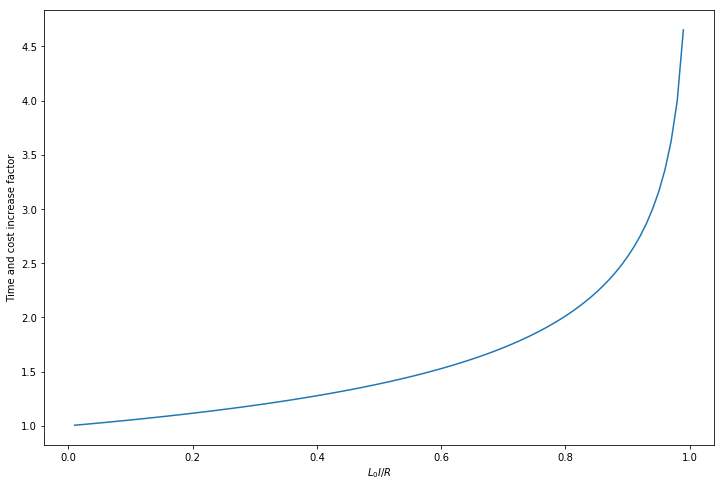

In [15]:
xvals = np.linspace(0.01,0.99,num=100)
yvals = -np.log(1-xvals)/xvals
plt.figure(figsize=(12,8))
plt.plot(xvals, yvals)
plt.xlabel('$L_0 I / R$')
plt.ylabel('Time and cost increase factor')

In terms of $R / L_0 I$, ie how much more can you afford to repay than the minimum:

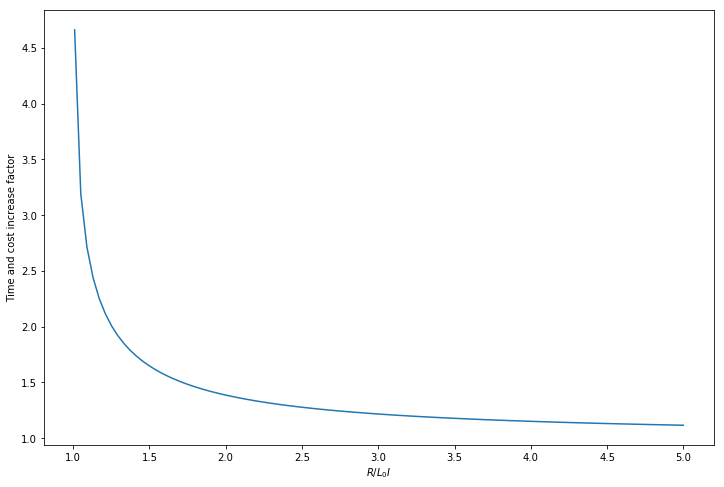

In [16]:
xvals = np.linspace(1.01,5,num=100)
yvals = -np.log(1-(1/xvals))*xvals
plt.figure(figsize=(12,8))
plt.plot(xvals, yvals)
plt.xlabel('$R / L_0 I$')
plt.ylabel('Time and cost increase factor')

Some sample factors:

In [19]:
xvals = np.array([1.1, 1.5, 2, 2.5, 3])
yvals = -np.log(1-(1/xvals))*xvals
print("\n".join(str(v) for v in zip(xvals, yvals)))

(1.1000000000000001, 2.6376848000782074)
(1.5, 1.6479184330021643)
(2.0, 1.3862943611198906)
(2.5, 1.2770640594149767)
(3.0, 1.2163953243244929)


## Calculator: plug in values

In [20]:
# Enter an annual interest rate and a monthly amount to pay off
I_annual = 0.0475
R = 5000

In [24]:
I = I_annual/12.0
print('Monthly interest rate',I)
#Now F = L_0 * I / R, so for a given L_0 the factor is I/R
print(I/R)

Monthly interest rate 0.003958333333333334
7.916666666666668e-07


In [25]:
# Max allowed L_0 at F==1, so L_0 = R/I
# This is max in that we can just pay the interest. A bank probably wouldn't allow it...
maxL = R/I
print("Max loan",maxL)

Max loan 1263157.894736842


In [26]:
def cost_factor(inefficiency):
    return -np.log(1-inefficiency)/inefficiency

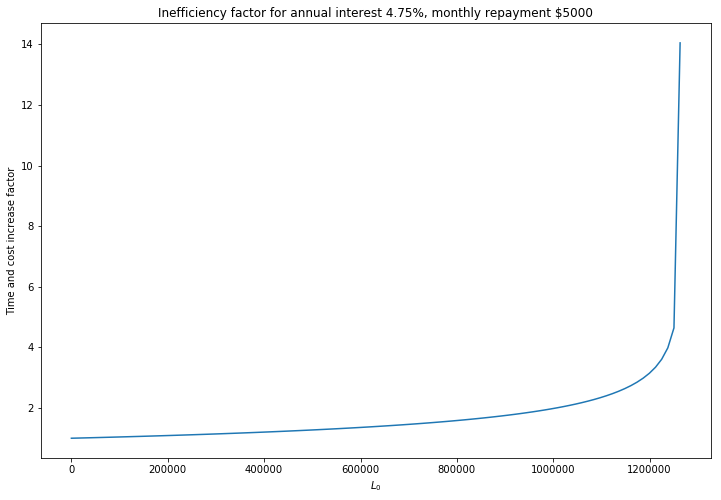

In [29]:
loan_values = np.linspace(0.01,maxL-1,num=100)
yvals = cost_factor(loan_values*I/R)
plt.figure(figsize=(12,8))
plt.plot(loan_values, yvals)
plt.xlabel('$L_0$')
plt.ylabel('Time and cost increase factor')
plt.title('Inefficiency factor for annual interest {0}%, monthly repayment ${1}'.format(I_annual*100,R))

Base repayment time for various loan sizes (i.e. if there were no interest) and repayment time at given interest rate.

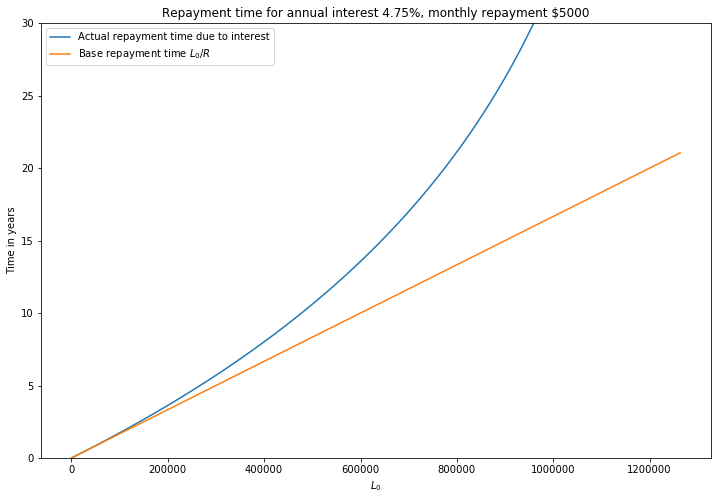

In [31]:
loan_values = np.linspace(0.01,maxL-1,num=100)
basevals = (loan_values/R)/12
yvals = (loan_values/R)/12*cost_factor(loan_values*I/R)
plt.figure(figsize=(12,8))
plt.plot(loan_values, yvals)
plt.plot(loan_values, basevals)
plt.xlabel('$L_0$')
plt.ylabel('Time in years')
plt.ylim((0,30))
plt.title('Repayment time for annual interest {0}%, monthly repayment ${1}'.format(I_annual*100,R))
plt.legend(["Actual repayment time due to interest","Base repayment time $L_0/R$"])

As above, but use the exact formula, not the $(ln(1+I)=I$ approximation. i.e.
$$T = -\frac{\ln (1 - L_0 I / R)}{\ln (I + 1)}$$

In [32]:
def exact_repayment_time(L0,I,R):
    return -np.log(1-(L0*I/R))/math.log(I+1)

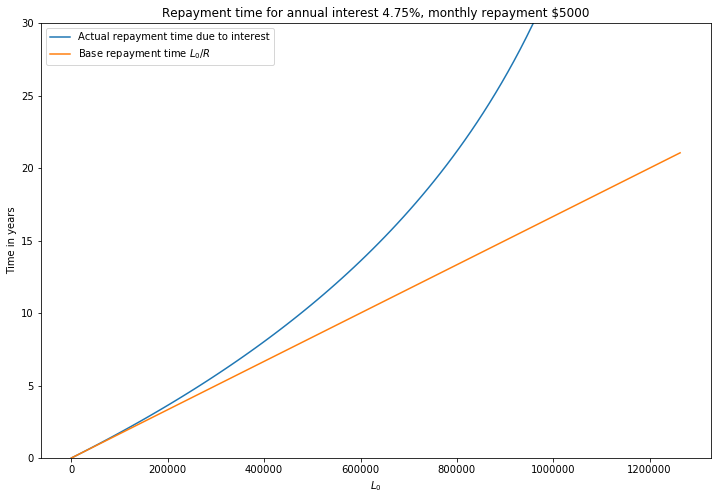

In [33]:
loan_values = np.linspace(0.01,maxL-1,num=100)
basevals = (loan_values/R)/12
yvals = exact_repayment_time(loan_values,I,R)/12
plt.figure(figsize=(12,8))
plt.plot(loan_values, yvals)
plt.plot(loan_values, basevals)
plt.xlabel('$L_0$')
plt.ylabel('Time in years')
plt.ylim((0,30))
plt.title('Repayment time for annual interest {0}%, monthly repayment ${1}'.format(I_annual*100,R))
plt.legend(["Actual repayment time due to interest","Base repayment time $L_0/R$"])